In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("candy-data.csv", index_col=0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB
None
       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.1647

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Verteilung von numerische Variablen


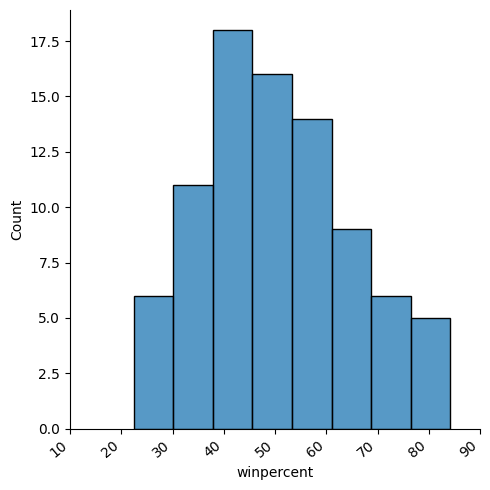

In [23]:
def dist_numerische_variable(df, variable):
     
    ax = sns.displot(df, x=variable)
    ax.set_xticklabels( rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

dist_numerische_variable(df, 'winpercent')

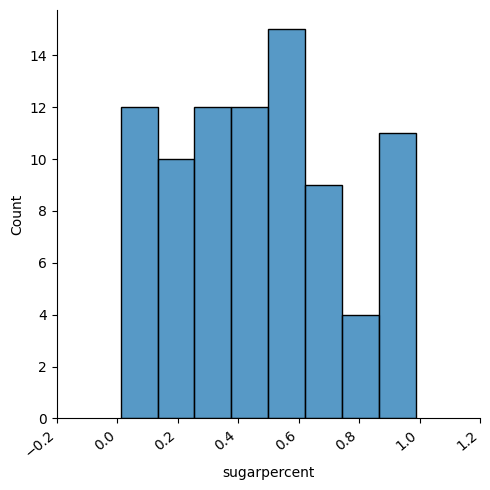

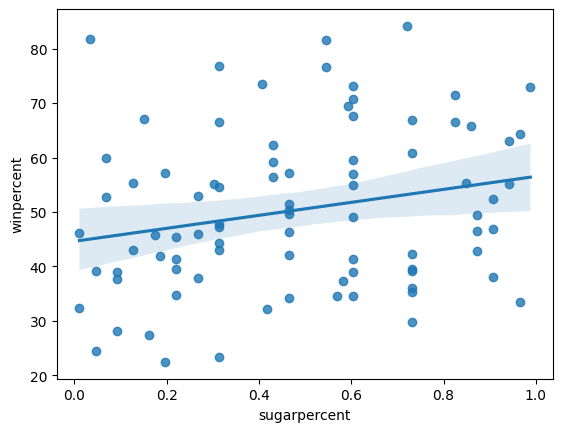

In [24]:
def dist_reg_numerische_variable(df, variable):
     
    dist_numerische_variable(df,variable)
    sns.regplot(x=variable, y='winpercent', data=df)
dist_reg_numerische_variable(df, 'sugarpercent')

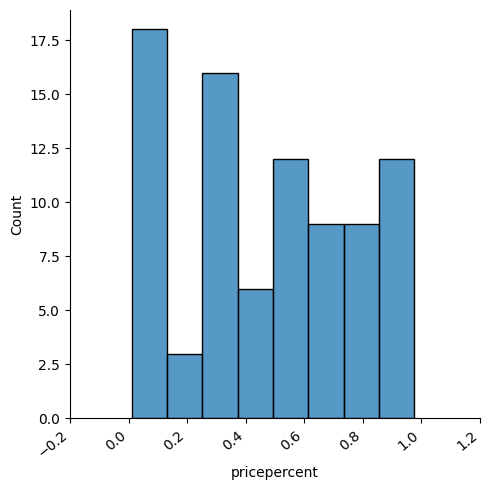

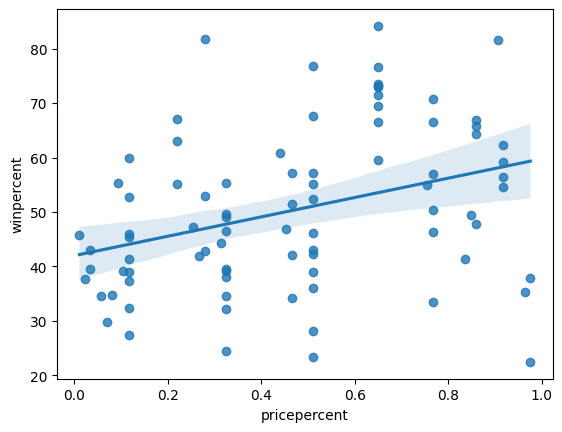

In [25]:
dist_reg_numerische_variable(df, 'pricepercent')

beide sind nicht normalverteilt und weisen eine schwache Korrelation mit dem Ergebnis auf
### Zutaten Anzahl analysen

In [26]:
zutaten = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer']

In [27]:
df_anzahl = df.copy()
df_anzahl['zutaten_zahl'] = df[zutaten].sum(axis=1)
df_anzahl['winquantile'] = pd.qcut(df['winpercent'], 4, labels=False)

df_anzahl.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3,3
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2,3
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0,1
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1,2


In [ ]:
df_anzahl.groupby('winquantile').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl
winquantile,,,,,,,,,,,,,
0,0.136364,0.500000,0.136364,0.045455,0.045455,0.000000,0.272727,0.045455,0.636364,0.402227,0.376909,33.219809,0.863636
1,0.142857,0.714286,0.047619,0.047619,0.047619,0.000000,0.333333,0.095238,0.571429,0.431286,0.353857,43.728361,1.000000
2,0.571429,0.476190,0.142857,0.190476,0.047619,0.095238,0.095238,0.333333,0.523810,0.478429,0.514476,54.507490,1.523810
3,0.904762,0.095238,0.333333,0.380952,0.190476,0.238095,0.000000,0.523810,0.333333,0.606286,0.634667,70.625537,2.142857


Es sieht so aus, als hätte Beliebt Süßwaren ungefähr zwei Zutaten, enthält Schokolade und Karamell/peanutalmond, ist möglicherweise ein Riegel, sicher kein hartes Bonbon, oft nur einzeln in der Packung, enthält mehr Zucker und ist auch teurer als der Durchschnitt.